In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/content/tea_tasting_dataset_100.xlsx"

df = pd.read_csv("../Datasets/tea_tasting.csv")

# Encode categorical variables
label_encoders = {}
for col in ['Tea_Type', 'Sugar_Added', 'Milk_Added', 'Smell_Strength', 'Color_Strength', 'Liked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later interpretation

# Define features and target
X = df.drop(columns=['Liked'])  # Features
y = df['Liked']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importances:\n", importance_df)


Model Accuracy: 0.35
Confusion Matrix:
 [[2 7]
 [6 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       0.42      0.45      0.43        11

    accuracy                           0.35        20
   macro avg       0.33      0.34      0.34        20
weighted avg       0.34      0.35      0.35        20

Feature Importances:
           Feature  Importance
2   Temperature_C    0.309389
3   Brew_Time_min    0.189471
6  Color_Strength    0.131370
0        Tea_Type    0.129320
5  Smell_Strength    0.126381
4      Milk_Added    0.057380
1     Sugar_Added    0.056689


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/content/tea_tasting_dataset_100.xlsx"

df = pd.read_csv("../Datasets/tea_tasting.csv")

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='Liked', data=df)
plt.title("Distribution of Tea Preference")
plt.show()

sns.pairplot(df, hue='Liked')
plt.show()

# Encode categorical variables
label_encoders = {}
for col in ['Tea_Type', 'Sugar_Added', 'Milk_Added', 'Smell_Strength', 'Color_Strength', 'Liked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later interpretation

# Define features and target
X = df.drop(columns=['Liked'])  # Features
y = df['Liked']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importances:\n", importance_df)

# Visualizing Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance in Tea Preference Prediction")
plt.show()


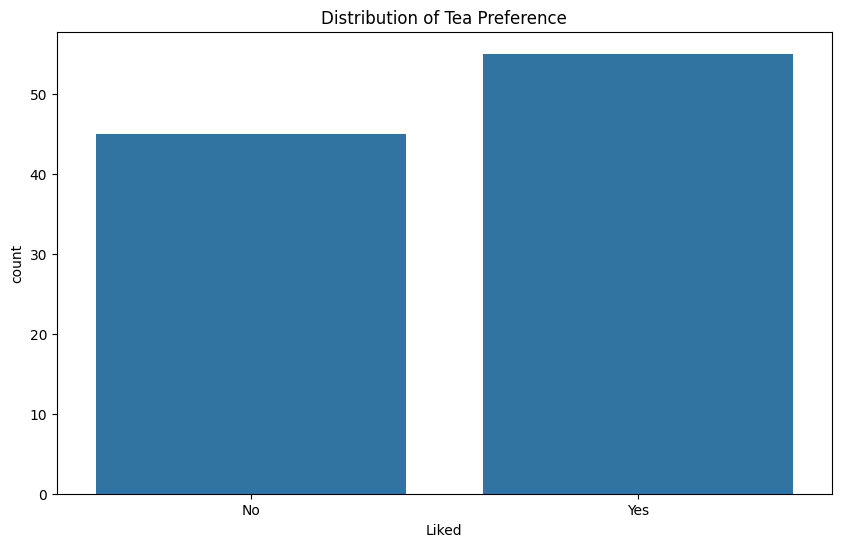

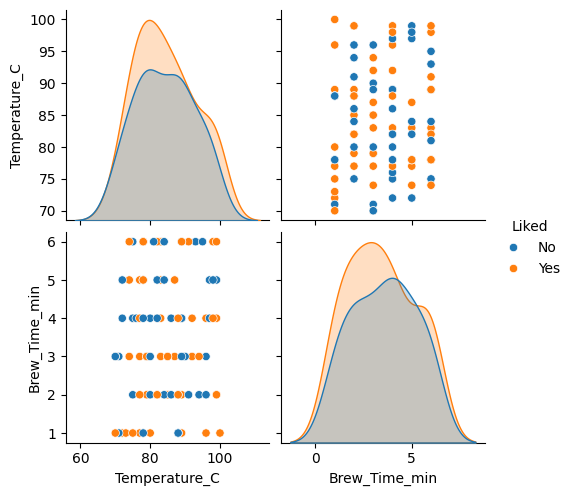

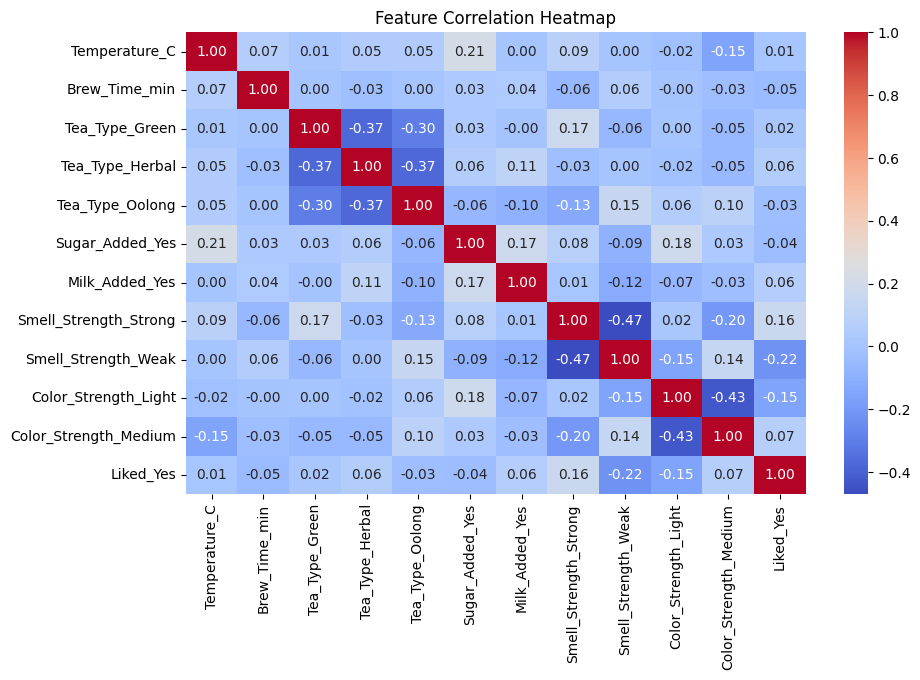

Model Accuracy: 0.5555555555555556
Confusion Matrix:
 [[5 4]
 [4 5]]
Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.56      0.56         9
        True       0.56      0.56      0.56         9

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.56        18
weighted avg       0.56      0.56      0.56        18

Feature Importances:
                   Feature  Importance
0           Temperature_C    0.253094
1           Brew_Time_min    0.209016
7   Smell_Strength_Strong    0.092012
9    Color_Strength_Light    0.076630
6          Milk_Added_Yes    0.062527
5         Sugar_Added_Yes    0.058226
8     Smell_Strength_Weak    0.057214
10  Color_Strength_Medium    0.050692
2          Tea_Type_Green    0.048542
3         Tea_Type_Herbal    0.047792
4         Tea_Type_Oolong    0.044254


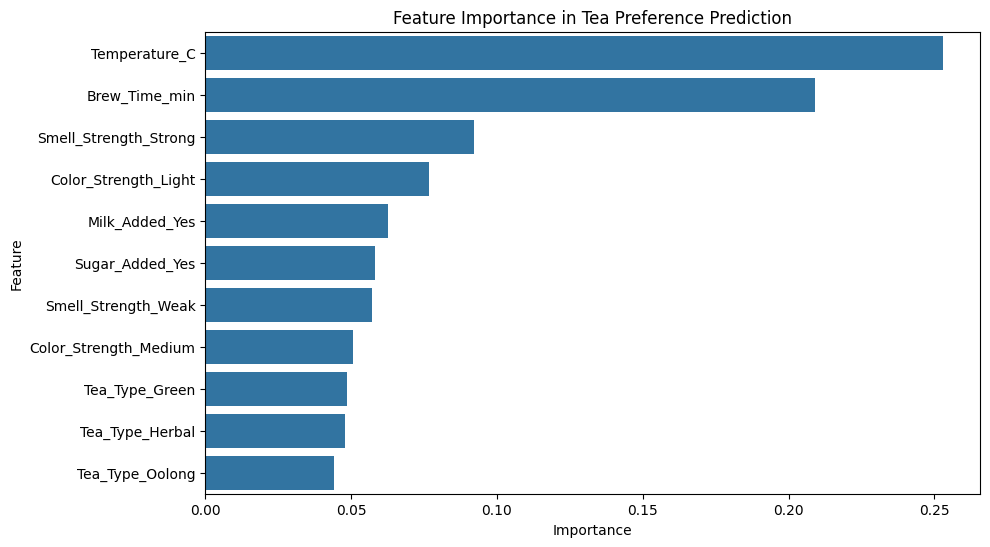

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

# Load the dataset
file_path = "/content/tea_tasting_dataset_100.xlsx"
df = pd.read_csv("../Datasets/tea_tasting.csv")

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Tea_Type', 'Sugar_Added', 'Milk_Added', 'Smell_Strength', 'Color_Strength', 'Liked']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='Liked', data=df)
plt.title("Distribution of Tea Preference")
plt.show()

sns.pairplot(df, hue='Liked')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X = df_encoded.drop(columns=['Liked_Yes'])  # Features
y = df_encoded['Liked_Yes']  # Target variable

# Apply Sampling (Resampling for balanced classes)
df_majority = df_encoded[df_encoded['Liked_Yes'] == 0]
df_minority = df_encoded[df_encoded['Liked_Yes'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_resampled = pd.concat([df_majority, df_minority_upsampled])

X_resampled = df_resampled.drop(columns=['Liked_Yes'])
y_resampled = df_resampled['Liked_Yes']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importances:\n", importance_df)

# Visualizing Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance in Tea Preference Prediction")
plt.show()


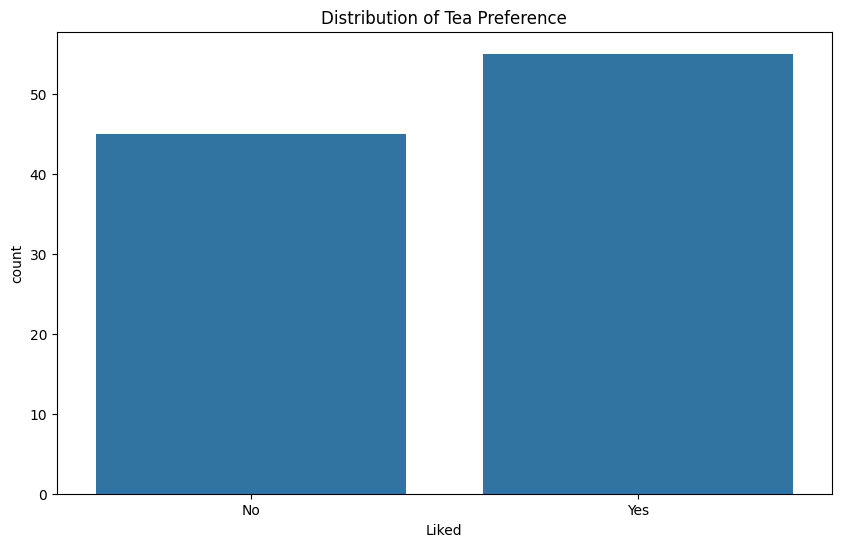

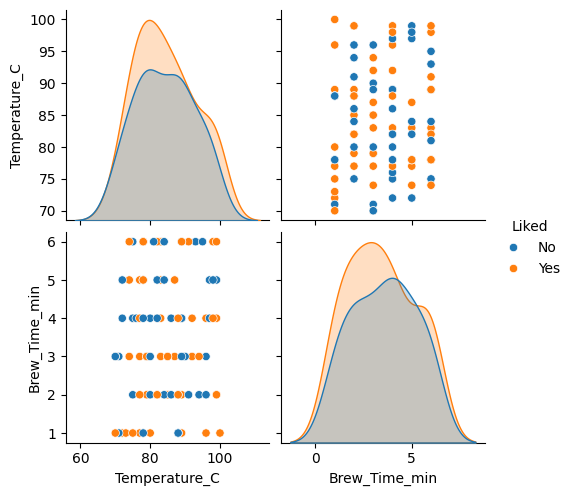

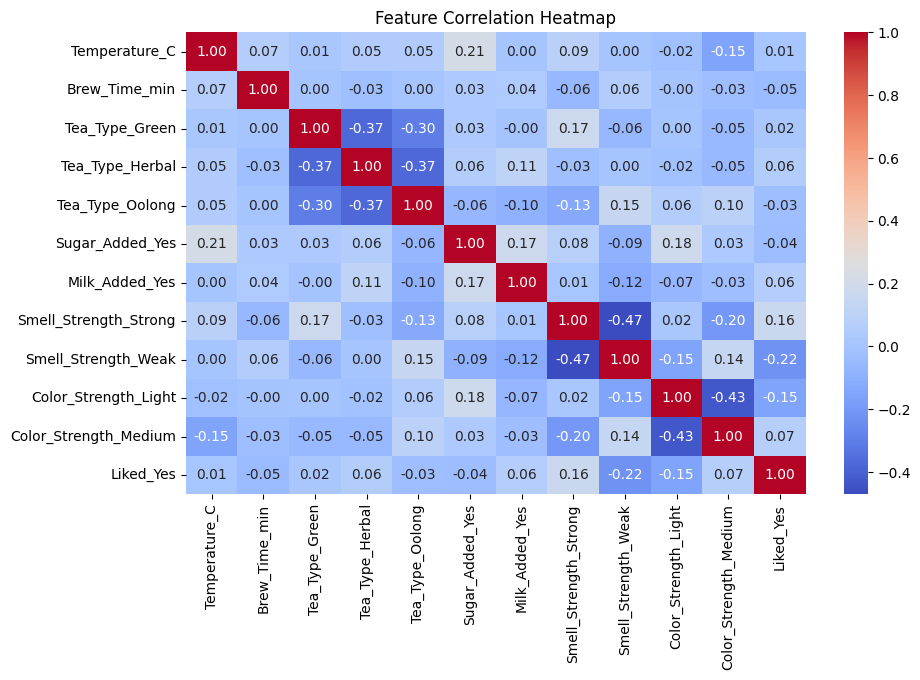

Model Accuracy: 0.5555555555555556
Confusion Matrix:
 [[5 4]
 [4 5]]
Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.56      0.56         9
        True       0.56      0.56      0.56         9

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.56        18
weighted avg       0.56      0.56      0.56        18

Feature Importances:
                   Feature  Importance
0           Temperature_C    0.253094
1           Brew_Time_min    0.209016
7   Smell_Strength_Strong    0.092012
9    Color_Strength_Light    0.076630
6          Milk_Added_Yes    0.062527
5         Sugar_Added_Yes    0.058226
8     Smell_Strength_Weak    0.057214
10  Color_Strength_Medium    0.050692
2          Tea_Type_Green    0.048542
3         Tea_Type_Herbal    0.047792
4         Tea_Type_Oolong    0.044254


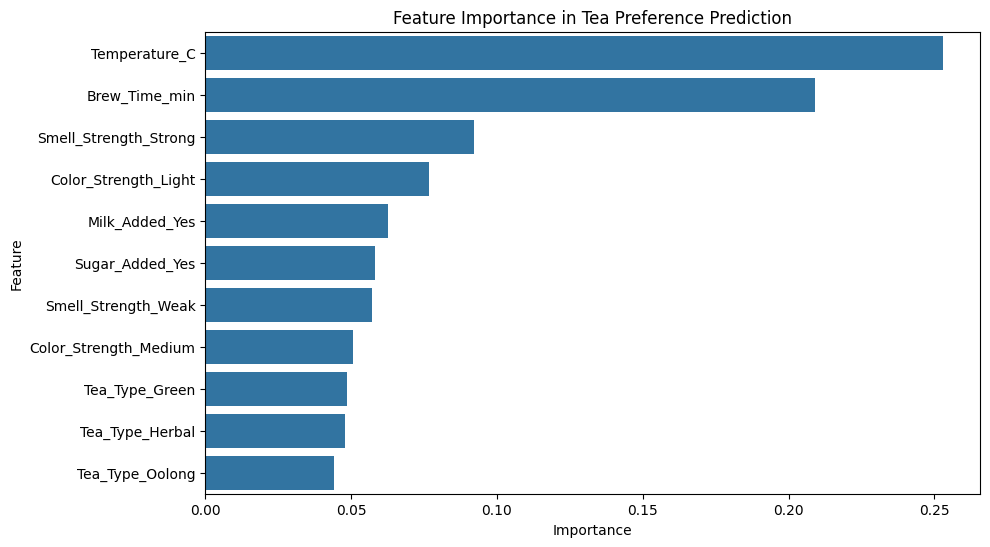

|--- Color_Strength_Light <= 0.50
|   |--- Smell_Strength_Strong <= 0.50
|   |   |--- Brew_Time_min <= 2.50
|   |   |   |--- Tea_Type_Herbal <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- Tea_Type_Herbal >  0.50
|   |   |   |   |--- Temperature_C <= 81.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Temperature_C >  81.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- Brew_Time_min >  2.50
|   |   |   |--- Temperature_C <= 83.50
|   |   |   |   |--- Tea_Type_Herbal <= 0.50
|   |   |   |   |   |--- Brew_Time_min <= 3.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Brew_Time_min >  3.50
|   |   |   |   |   |   |--- Tea_Type_Green <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Tea_Type_Green >  0.50
|   |   |   |   |   |   |   |--- Milk_Added_Yes <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Milk_Added_Yes >  0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   

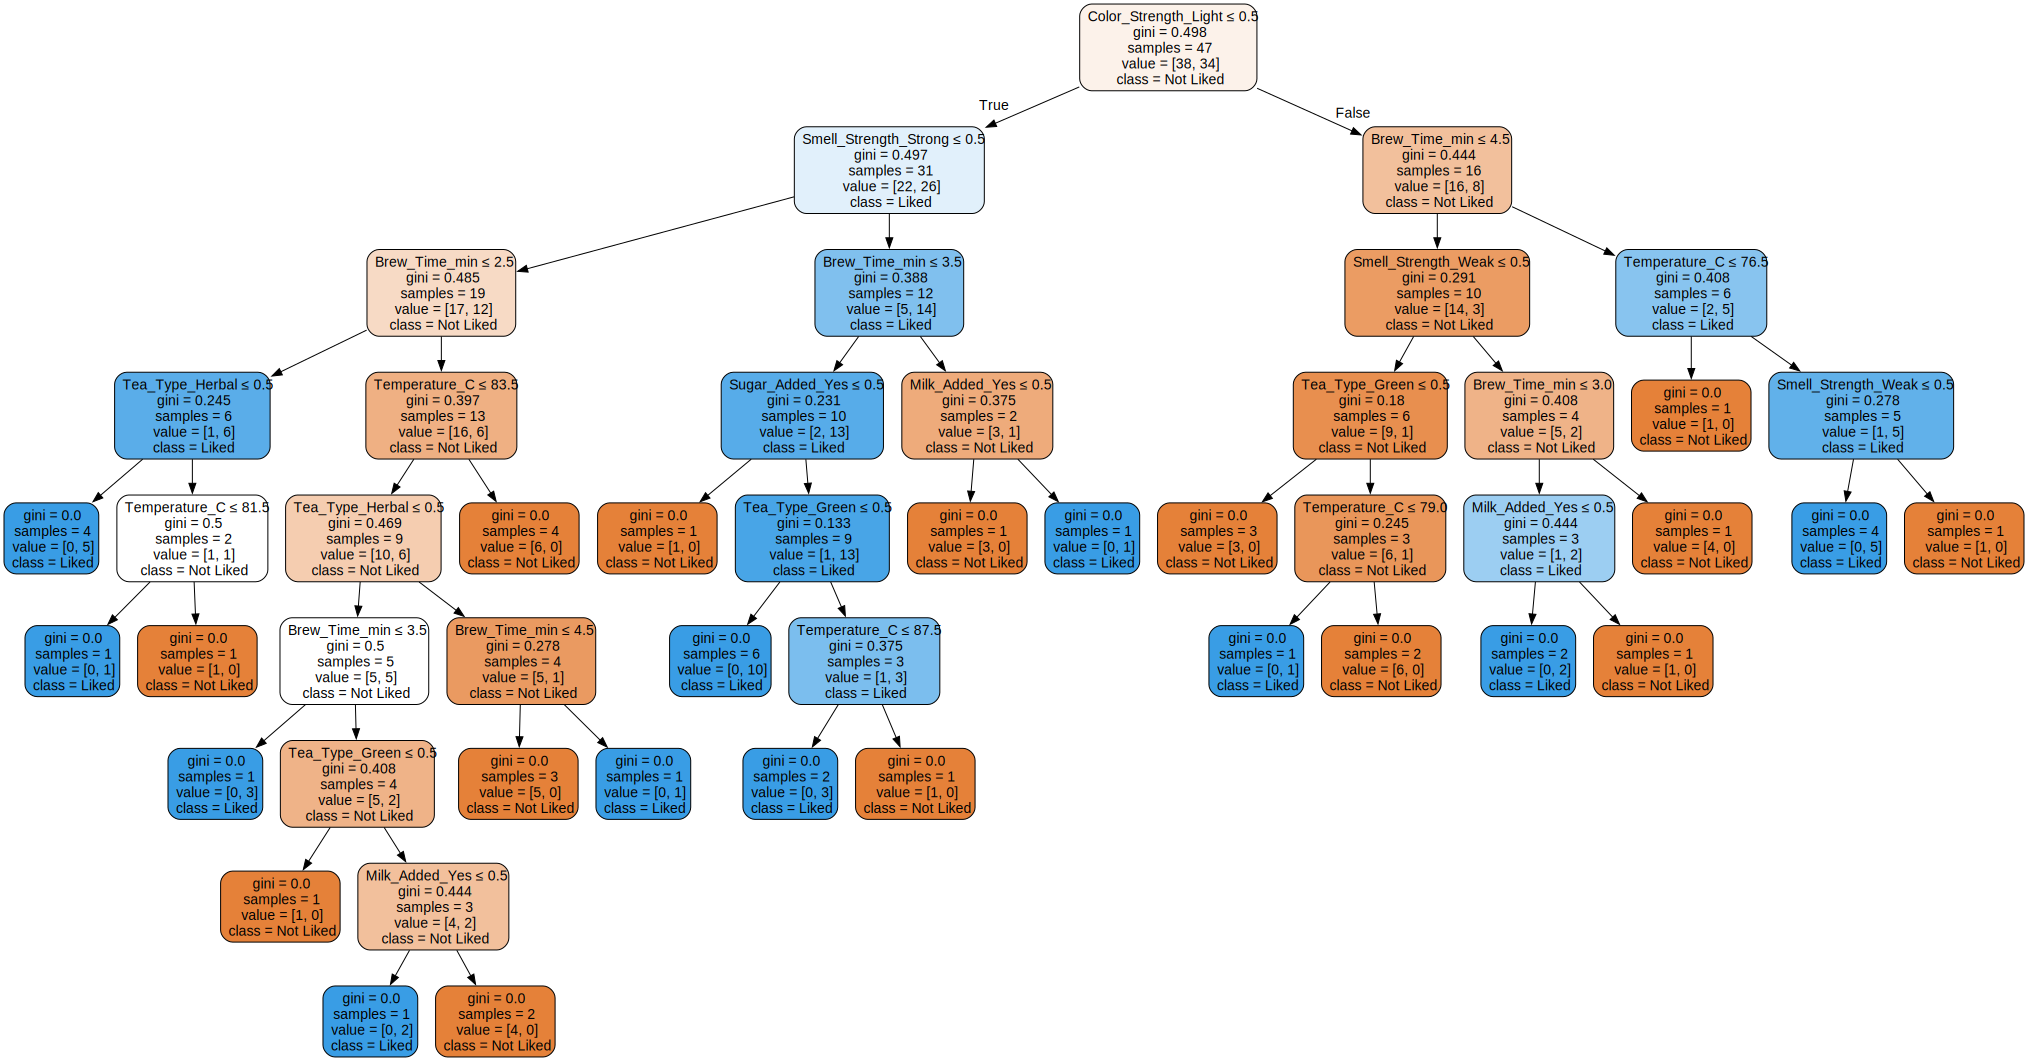

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.tree import export_text, export_graphviz
import graphviz

# Load the dataset
file_path = "/content/tea_tasting_dataset_100.xlsx"
df= pd.read_csv("../Datasets/tea_tasting.csv")

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Tea_Type', 'Sugar_Added', 'Milk_Added', 'Smell_Strength', 'Color_Strength', 'Liked']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='Liked', data=df)
plt.title("Distribution of Tea Preference")
plt.show()

sns.pairplot(df, hue='Liked')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X = df_encoded.drop(columns=['Liked_Yes'])  # Features
y = df_encoded['Liked_Yes']  # Target variable

# Apply Sampling (Resampling for balanced classes)
df_majority = df_encoded[df_encoded['Liked_Yes'] == 0]
df_minority = df_encoded[df_encoded['Liked_Yes'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_resampled = pd.concat([df_majority, df_minority_upsampled])

X_resampled = df_resampled.drop(columns=['Liked_Yes'])
y_resampled = df_resampled['Liked_Yes']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importances:\n", importance_df)

# Visualizing Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance in Tea Preference Prediction")
plt.show()

# Extract and visualize a decision tree from the random forest
single_tree = rf_model.estimators_[0]  # Get the first tree

# Print tree structure as text
print(export_text(single_tree, feature_names=list(X.columns)))

# Export tree visualization
dot_data = export_graphviz(single_tree, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as a file
graph.view()  # Opens the visualization

from sklearn.tree import export_text, export_graphviz

# Select one tree from the Random Forest
single_tree = rf_model.estimators_[0]

# Print tree structure in text format
tree_rules = export_text(single_tree, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(
    single_tree, out_file=None, feature_names=X.columns,
    class_names=['Not Liked', 'Liked'], filled=True, rounded=True, special_characters=True
)

# Render the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as 'decision_tree.pdf'
graph  # Displays the tree graph in the notebook
